In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

# import my own module
import function1 as fnc1

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

<h1><center>Supermarket Customers</center></h1>

**People**
<br>`ID`: Customer's unique identifier
<br>`Year_Birth`: Customer's birth year
<br>`Education`: Customer's education level
<br>`Marital_Status`: Customer's marital status
<br>`Income`: Customer's yearly household income
<br>`Kidhome`: Number of children in customer's household (a young human being below the age of puberty or below the legal age of majority) (a son or daughter of any age.)
<br>`Teenhome`: Number of teenagers in customer's household (a person aged between 13 and 19 years)
<br>`Dt_Customer`: Date of customer's enrollment with the company
<br>`Recency`: Number of days since customer's last purchase (jumlah hari sejak terakhir customer membeli sesuatu)
<br>`Complain`: 1 if the customer complained in the last 2 years, 0 otherwise (1 jika komplain dalam periode waktu 2 tahun ke belakang)

**Products**
<br>`MntWines`: Amount spent on wine in last 2 years
<br>`MntFruits`: Amount spent on fruits in last 2 years
<br>`MntMeatProducts`: Amount spent on meat in last 2 years
<br>`MntFishProducts`: Amount spent on fish in last 2 years
<br>`MntSweetProducts`: Amount spent on sweets in last 2 years
<br>`MntGoldProds`: Amount spent on gold in last 2 years

**Promotion**
<br>`NumDealsPurchases`: Number of purchases made with a discount
<br>`AcceptedCmp1`: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
<br>`AcceptedCmp2`: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
<br>`AcceptedCmp3`: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
<br>`AcceptedCmp4`: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
<br>`AcceptedCmp5`: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
<br>`Response`: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Place**
<br>`NumWebPurchases`: Number of purchases made through the company’s website
<br>`NumCatalogPurchases`: Number of purchases made using a catalog
<br>`NumStorePurchases`: Number of purchases made directly in stores
<br>`NumWebVisitsMonth`: Number of visits to the company’s website in the last month

1. Numerical: Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

2. Categorical:
    - ordinal : Education
    - nominal : Marital_Status, Complain, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response

3. Datetime
    Dt_Customer

4. Unknown : Z_CostContact, Z_Revenue

In [2]:
df = pd.read_csv(r'C:\Users\faisa\Desktop\DataSciencePurwadhika\Modul2\CapstonProjectModul2\data\raw\Supermarket Customers.csv', delimiter='\t')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [3]:
# number of rows dan columns
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# describe numerical type
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# describe non-numerical type
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [7]:
# check the quality of DataFrame
fnc1.qualitydf(df)

,columns,data_type,null_value(%),n_unique,zero_value,neg_value,sample_unique
0,ID,int64,0.000000,2240,True,False,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,int64,0.000000,59,False,False,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,object,0.000000,5,False,False,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,0.000000,8,False,False,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,float64,1.071429,1974,False,False,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,int64,0.000000,3,True,False,"[0, 1, 2]"
6,Teenhome,int64,0.000000,3,True,False,"[0, 1, 2]"
7,Dt_Customer,object,0.000000,663,False,False,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,int64,0.000000,100,True,False,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81,

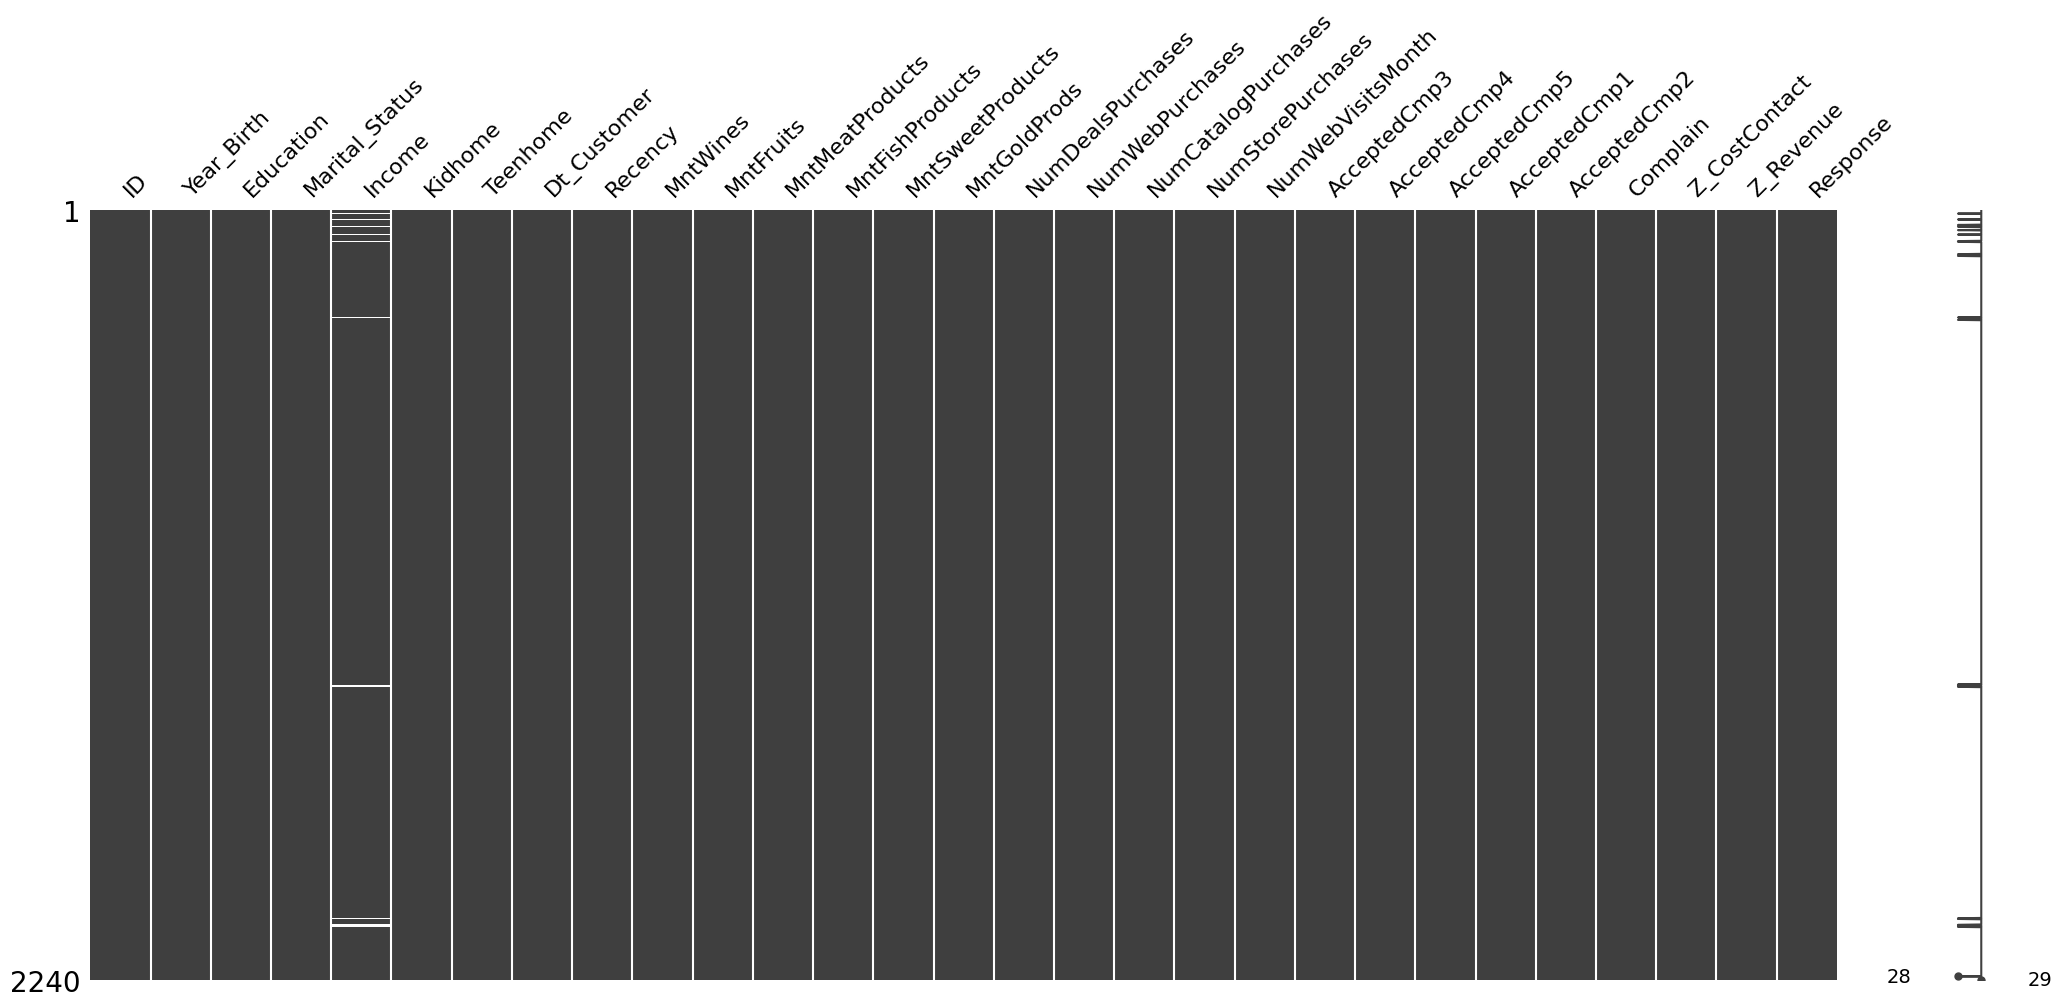

In [8]:
# check missing value with matrix graph
msno.matrix(df);

insight:
- There are 1% missing values in Income column

>#### Handling data type in Dt_Customer column

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


> ### Handling zero value in ID column
- with the assumption that values of 0 can be read as null values

In [10]:
# there is 1 row with zero value in ID column
df.loc[df['ID'] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
214,0,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,3,11,0


In [11]:
# generates random integer number with low equal to min ID and high equal to max ID
id = [id for id in df['ID']]
np.random.seed(22)
id_0 = 0
while True:
    trial = np.random.randint(low=1, high=11191)
    if trial not in id:
        id_0 += trial
        break
    else:
        continue

# replace zero value with random number
df['ID'] = df['ID'].replace(0,id_0)
df.loc[df['ID'] == id_0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
214,11126,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,3,11,0


In [12]:
# ID 0 has been replaced with 11126
df.query("ID == 0")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


> ### Handling outliers data

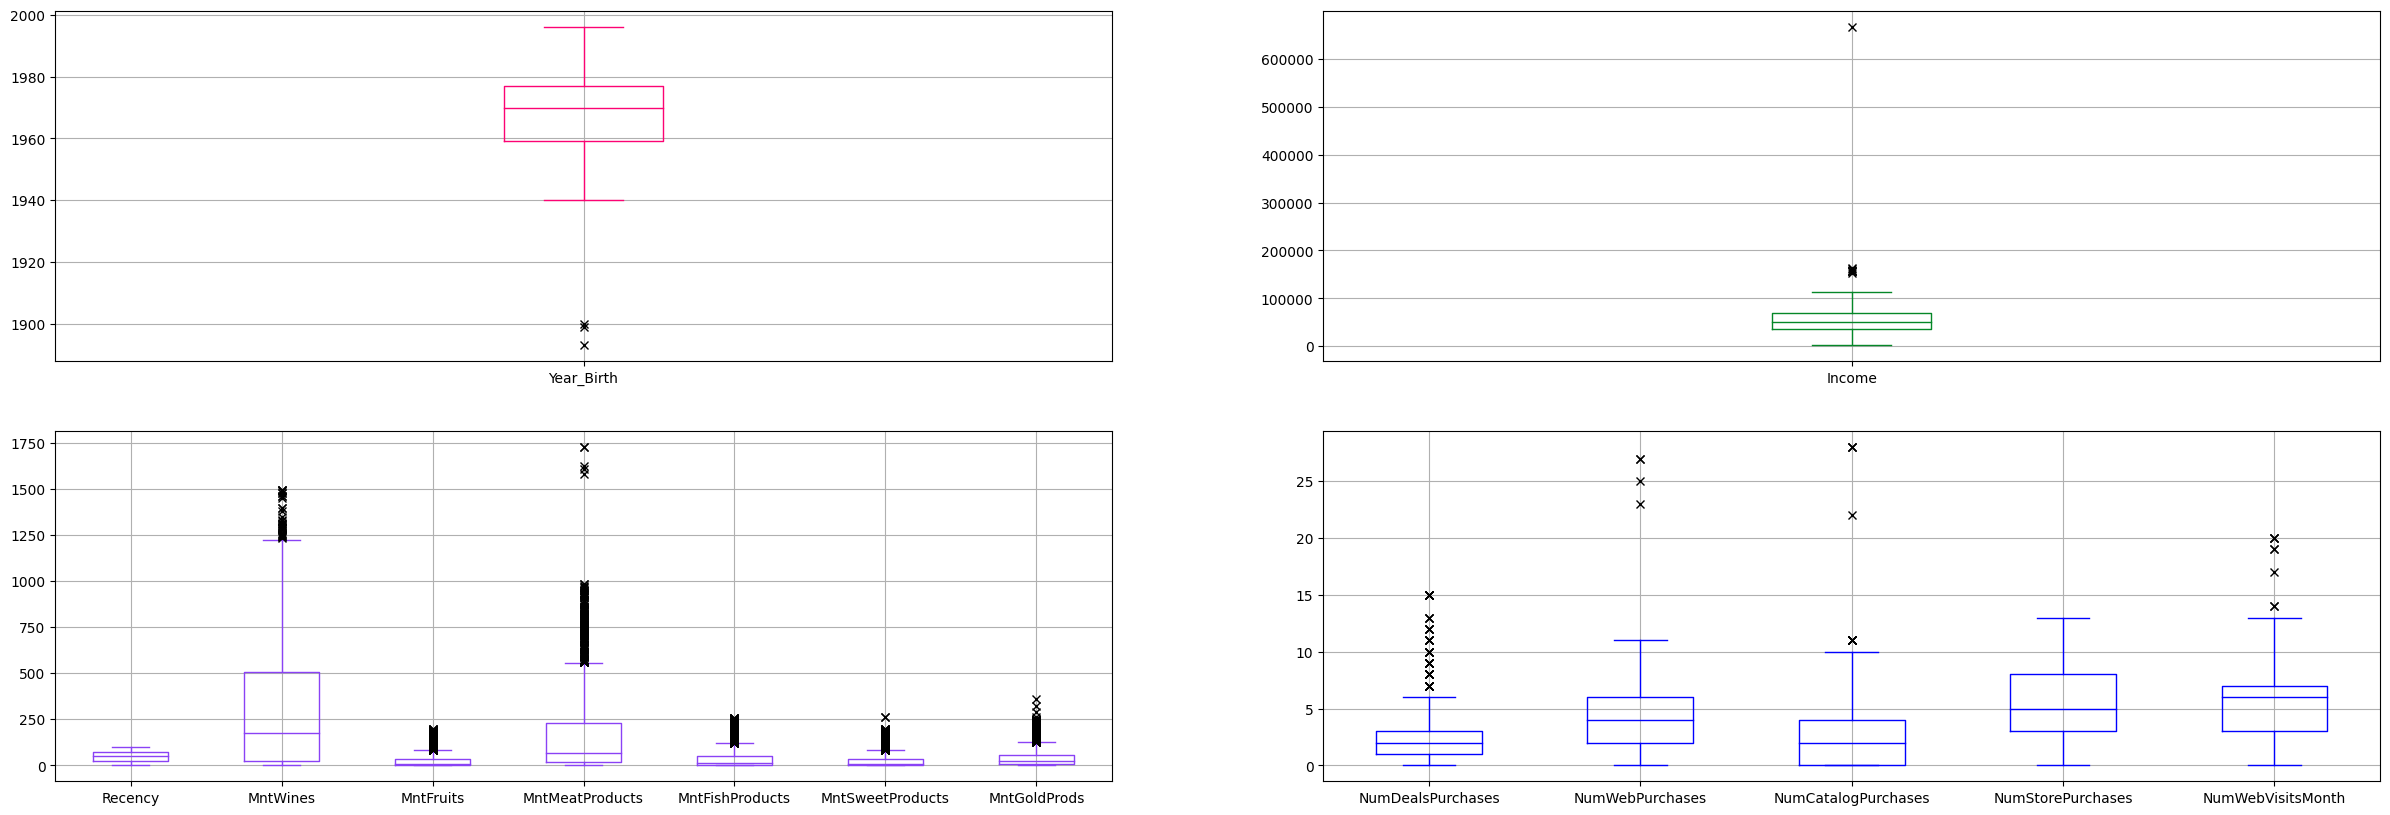

In [13]:
# check outliers data based on these numerical columns
df_num1 = df[['Year_Birth']]
df_num2 = df[['Income']]
df_num3 = df[['Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
df_num4 = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

# plot boxplot
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(30,10))

rows1 = [ax1,ax2]
rows2 = [ax3,ax4]
dflist1 = [df_num1, df_num2]
dflist2 = [df_num3, df_num4]
color1 = ['#fc0373', '#058728']
color2 = ['#8a42f5', 'blue']

for i in zip(rows1, rows2, dflist1, dflist2, color1, color2):
    i[2].boxplot(ax=i[0], color=i[-2], flierprops={"marker": "x"})
    i[3].boxplot(ax=i[1], color=i[-1], flierprops={"marker": "x"})

insight:
- There are outliers in the Year_Birth column, for outliers in other columns it's not a problem because they still make sense.

In [14]:
# IQR (Q3 - Q1) in Year_Birth column
q3 = fnc1.checkquantiles(df,'Year_Birth')[3]
q1 = fnc1.checkquantiles(df,'Year_Birth')[1]
iqr = q3 - q1

# lower bound
lowerbound = q1 - (1.5*iqr)

# check how many percents outliers data in Year_Birth column
print(f"There are {round((len(df.loc[df['Year_Birth'] < lowerbound]) / len(df)),5) * 100}% outliers data")

There are 0.134% outliers data


In [15]:
# locate the outlier data in Year_Birth column
df.loc[df['Year_Birth'] < lowerbound]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


In [16]:
# quantile of Income
quantile_income = fnc1.checkquantiles(df,'Income')

# quantile of Year_Birth
quantile_year_birth = fnc1.checkquantiles(df,'Year_Birth')

# mode of Year_Birth based on its quantile
mode1 = df.loc[(df['Year_Birth'] >= quantile_year_birth[0]) & (df['Year_Birth'] <= quantile_year_birth[1])]['Year_Birth'].mode()[0] # mode between min - q1
mode2 = df.loc[(df['Year_Birth'] >= quantile_year_birth[1]) & (df['Year_Birth'] <= quantile_year_birth[2])]['Year_Birth'].mode()[0] # mode between q1 - q2
mode3 = df.loc[(df['Year_Birth'] >= quantile_year_birth[2]) & (df['Year_Birth'] <= quantile_year_birth[3])]['Year_Birth'].mode()[0] # mode between q2 - q3
mode4 = df.loc[(df['Year_Birth'] >= quantile_year_birth[3]) & (df['Year_Birth'] <= quantile_year_birth[4])]['Year_Birth'].mode()[0] # mode between q3 - q4

# check where the income outliers are located based on its quantile, then apply year_birth with Year_Birth's mode based on income's quantile
def new_year_birth(df):
    # get outlier data
    if df['Year_Birth'] < lowerbound:
        if df['Income'] <= quantile_income[1] and df['Income'] >= quantile_income[0]:
            return mode1
        elif df['Income'] <= quantile_income[2] and df['Income'] >= quantile_income[1]:
            return mode2
        elif df['Income'] <= quantile_income[3] and df['Income'] >= quantile_income[2]:
            return mode3
        else:
            return mode4
    else:
        return df['Year_Birth']

df['Year_Birth'] = df.apply(new_year_birth, axis=1)

In [17]:
# ensure year_birth outliers have changed
df.query("ID == 7829 or ID == 11004 or ID == 1150")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1970,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1976,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1978,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


> ### Handling missing values in Income column

<br> 1. According to the this articles [Married people earn more than single individuals. Here’s why.](https://bigthink.com/smart-skills/married-wage-gap/#:~:text=That%20married%20people%20make%20more,to%20be%20greater%20for%20men.) and [Marriage and Money: The Effect of Marital Status on Attitudes Toward Pay and Finances](https://www.researchgate.net/publication/249690568_Marriage_and_Money_The_Effect_of_Marital_Status_on_Attitudes_Toward_Pay_and_Finances#:~:text=Research%20has%20shown%20that%20marital,attitudes%20toward%20pay%20and%20finances.), marital status and education level affect income
<br> 2. According to the this article [Born to run behind? Persisting birth month effects on earnings](https://www.sciencedirect.com/science/article/pii/S0927537116302196), year_birth affect income

<br> **But, we have to validate by looking at how the correlation and significancy between those columns using phik correlation.**

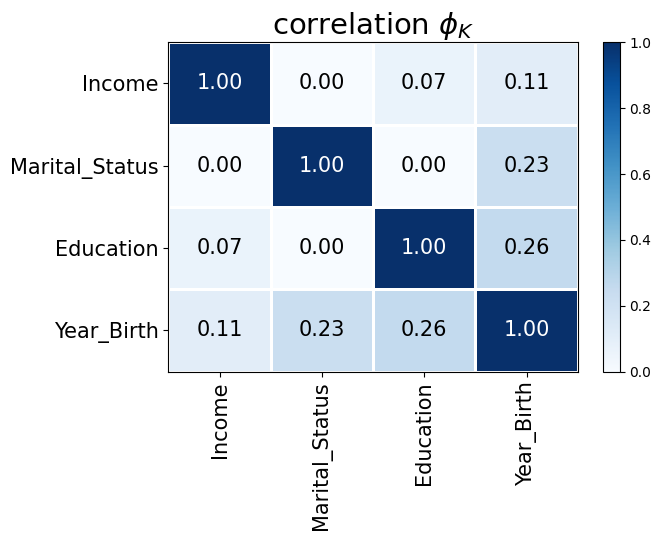

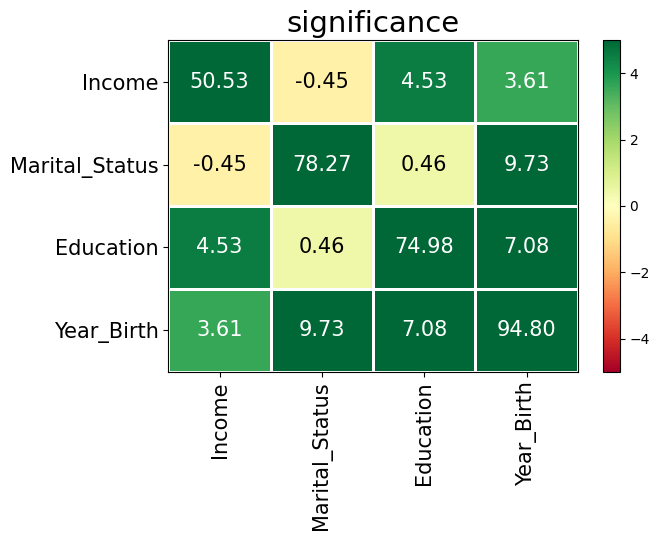

In [18]:
# correlation between Year_Birth, Education, Marital Status, and Income using phik correlation package

# import module
import phik
from phik.report import plot_correlation_matrix
from phik import report

# phik correlation
phik_overview = df[['Year_Birth','Education', 'Marital_Status', 'Income']].phik_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(7,5.5))

# significance between those columns
significance_overview = df[['Year_Birth','Education', 'Marital_Status', 'Income']].significance_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1.5, figsize=(7,5.5))

plt.tight_layout()

insight:
<br>- Income is not correlated with marital status and the significance is low
<br>- Income is low correlated with education level, but the significance is high
<br>- Income is low correlated with year_birth, but the significance is high

<br> **So it can be concluded, education level and/or year of birth has an effect on income. Replace NaN value in Income column based on their year birth and/or education level then.**

In [19]:
# check the interval quantile 0, quantile 0.25, quantile 0.5, and quantile 1
df['Year_Birth'].describe()

count    2240.000000
mean     1968.909375
std        11.696638
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

> ### check the income distribution wheater normal distribution or not normal distribution ?

1. Graphical Methods (boxplot and qqplot)

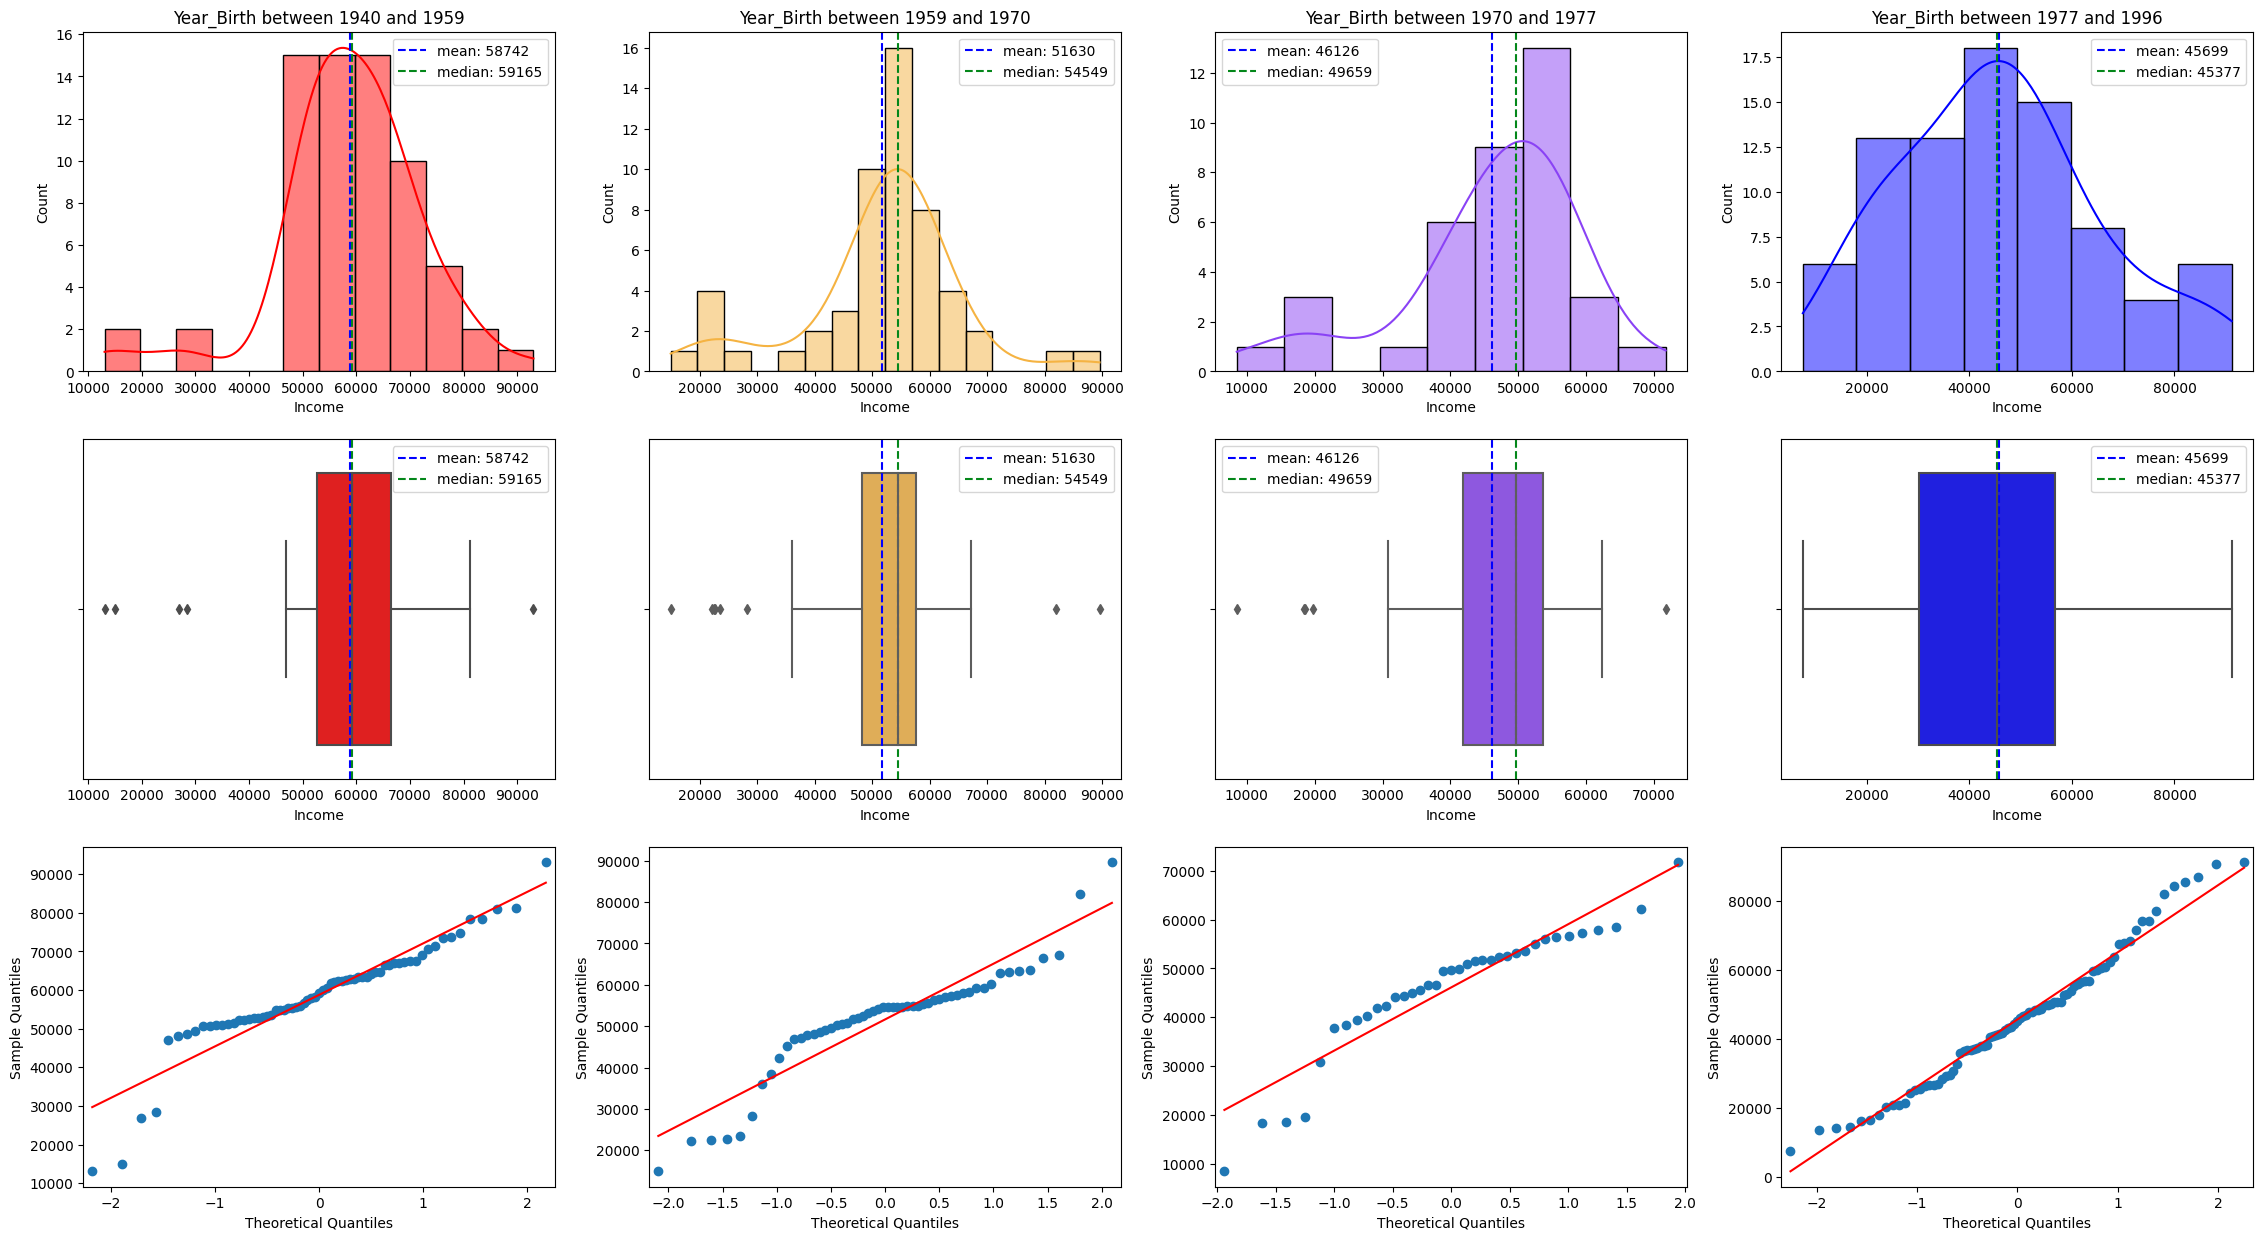

In [20]:
df1 = df.query("Year_Birth >= 1940 and Year_Birth <= 1959").groupby(['Year_Birth','Education']).agg({'Income' : 'mean'}).reset_index() # year_birth between 1940 - 1959 # min s/d q1 (.25)
df2 = df.query("Year_Birth >= 1959 and Year_Birth <= 1970").groupby(['Year_Birth','Education']).agg({'Income' : 'mean'}).reset_index() # year_birth between 1959 - 1970 # q1 (.25) s/d q2 (.5)
df3 = df.query("Year_Birth >= 1970 and Year_Birth <= 1977").groupby(['Year_Birth','Education']).agg({'Income' : 'mean'}).reset_index() # year_birth between 1970 - 1977 # q2 (.5) s/d q3 (.75)
df4 = df.query("Year_Birth >= 1977 and Year_Birth <= 1996").groupby(['Year_Birth','Education']).agg({'Income' : 'mean'}).reset_index() # year_birth between 1977 - 1996 # q3 (.75) s/d q4 (1)

# modul for qqplot
import statsmodels.api as sm

# Check the distribution with Graphical Methods
fig, ((ax1,ax2,ax3,ax4), (ax5,ax6,ax7,ax8), (ax9,ax10,ax11,ax12)) = plt.subplots(nrows=3, ncols=4, figsize=(28,15))

axhist = [ax1,ax2,ax3,ax4]
axbox = [ax5,ax6,ax7,ax8]
axqq = [ax9,ax10,ax11,ax12]
dflist = [df1,df2,df3,df4]
title = ['Year_Birth between 1940 and 1959', 'Year_Birth between 1959 and 1970', 'Year_Birth between 1970 and 1977','Year_Birth between 1977 and 1996']
color = ['red', '#f5b342', '#8a42f5', 'blue']

for i in zip(dflist, axhist, axbox, axqq, title, color):
    sns.histplot(i[0], x='Income', kde=True, ax=i[1], color=i[5])
    sns.boxplot(i[0], x='Income', ax=i[2], color=i[5])
    sm.qqplot(i[0]['Income'], line='s', ax=i[3])
    i[1].set_title(i[4])
    i[1].axvline(x=i[0]['Income'].mean(), color='blue', label=f"mean: {round(i[0]['Income'].mean())}", linestyle='--')
    i[1].axvline(x=i[0]['Income'].median(), color='#04871a', label=f"median: {round(i[0]['Income'].median())}", linestyle='--')
    i[2].axvline(x=i[0]['Income'].mean(), color='blue', label=f"mean: {round(i[0]['Income'].mean())}", linestyle='--')
    i[2].axvline(x=i[0]['Income'].median(), color='#04871a', label=f"median: {round(i[0]['Income'].median())}", linestyle='--')
    i[1].legend()
    i[2].legend()

Insight:
<br>
a. In the range of year_birth 1940 to 1959, when using histograms and boxplots tend to be normal distribution and when using qqplots tend not to be completely normal distribution. Likewise, in the range of year_birth 1977 to 1996
<br>
b. In the year_birth ranges 1959 to 1970 and 1970 to 1977, when using the histogram, boxplot, and qq plot, the graphs show that the distribution is not normal.  Then when viewed from the mean and median values, it shows that for that year_birth range, it tends to be negatively skewed.

2. Frequentist Test: Shapiro Wilk Test

In [21]:
from scipy.stats import shapiro

# list of df based on year_birth
dflist1 = ['df1','df2','df3','df4']

# check the distribution
for i in dflist1:
    # pvalue
    stats, pvalue = shapiro(eval(i)['Income'])
    # check the pvalue
    if pvalue > 0.05:
        print(f"pvalue: {pvalue}. So, income in {i} has normal distribution")
    else:
        print(f"pvalue: {pvalue}. So, income in {i} has NOT normal distribution")

pvalue: 0.00011008876754203811. So, income in df1 has NOT normal distribution
pvalue: 0.00016708018665667623. So, income in df2 has NOT normal distribution
pvalue: 0.0029091218020766973. So, income in df3 has NOT normal distribution
pvalue: 0.14592832326889038. So, income in df4 has normal distribution


insight:
- based on shapiro test, all income column in all DataFrames are not normal distributed, besides df4
- So, we can use Median to fill NaN values in Income column, except if year_birth and education belongs to df4

In [22]:
# DataFrame income is NaN
df_income_nan = df.query("Income.isna()").reset_index(drop=True)
df_income_nan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
1,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
2,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
3,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
4,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
5,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
6,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
7,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
8,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
9,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [23]:
# based on Saphiro Test, only df4 which has normal distribution, so we use mean as aggregate in that DataFrame. Otherwise, we use median as aggregate
df1 = df.query("Year_Birth >= 1940 and Year_Birth <= 1959").groupby(['Year_Birth','Education']).agg({'Income' : 'median'}).reset_index()
df2 = df.query("Year_Birth >= 1959 and Year_Birth <= 1970").groupby(['Year_Birth','Education']).agg({'Income' : 'median'}).reset_index()
df3 = df.query("Year_Birth >= 1970 and Year_Birth <= 1977").groupby(['Year_Birth','Education']).agg({'Income' : 'median'}).reset_index()
df4 = df.query("Year_Birth >= 1977 and Year_Birth <= 1996").groupby(['Year_Birth','Education']).agg({'Income' : 'mean'}).reset_index()

# concat all df1, df2, df3, and df4
df_concat = pd.concat([df1,df2,df3,df4], ignore_index=True)

# check all combination between year_birth and education
len1 = 0
for i in df_income_nan.index:
    for j in df_concat.index:
        if df_income_nan.iloc[i][1] == df_concat.iloc[j][0] and df_income_nan.iloc[i][2] == df_concat.iloc[j][1]:
            len1 += 1
            break
        else:
            continue

if len1 == len(df_income_nan):
    print("all combinations exist")
else:
    print("all combinations doesn't exist")

all combinations exist


In [24]:
income_for_nan = []
# fill NaN values with Median based on their year_birth and education
for i in df_income_nan.index:
    for j in df_concat.index:
        if df_income_nan.iloc[i][1] == df_concat.iloc[j][0] and df_income_nan.iloc[i][2] == df_concat.iloc[j][1] :
            income_for_nan.append(df_concat.iloc[j][2])
            break
# income_for_nan        
df_income_nan['Income'] = np.array(income_for_nan)
df_income_nan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1994,1983,Graduation,Married,43476.173913,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
1,5255,1986,Graduation,Single,48825.000000,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
2,7281,1959,PhD,Single,53195.500000,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
3,7244,1951,Graduation,Single,55547.000000,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
4,8557,1982,Graduation,Single,49943.900000,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
5,10629,1973,2n Cycle,Married,35688.000000,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
6,8996,1957,PhD,Married,41437.000000,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
7,9235,1957,Graduation,Single,50388.000000,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
8,5798,1973,Master,Together,44051.000000,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
9,8268,1961,PhD,Married,63342.000000,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [25]:
# DataFrame which contain Income is NOT NaN values
df_income_not_nan = df.query("~Income.isna()")
df_income_not_nan

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [26]:
# concat all data that is income nan and income NOT nan
df_updated = pd.concat([df_income_not_nan, df_income_nan], ignore_index=True)
df_updated

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,5079,1971,Graduation,Married,42075.500000,1,1,2013-03-03,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,3,11,0
2236,10339,1954,Master,Together,52884.500000,0,1,2013-06-23,83,161,0,22,0,0,24,2,4,1,4,6,0,0,0,0,0,0,3,11,0
2237,3117,1955,Graduation,Single,59925.000000,0,1,2013-10-18,95,264,0,21,12,6,147,3,6,1,5,7,0,0,0,0,0,0,3,11,0
2238,5250,1943,Master,Widow,71335.500000,0,0,2013-10-30,75,532,126,490,164,126,126,1,5,5,11,1,0,0,1,0,0,0,3,11,1


In [27]:
# Income has been replaced
df_updated.query("Income.isna()")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


>### validate whether the imputation technique is correct or not ?

1. Graphical Method (Histogram, Boxplot, qqplot)

In [28]:
# DataFrame BEFORE handling missing values
df_original = df.copy().sort_values(by='ID').reset_index(drop=True)

# DataFrame AFTER handling missing values
df_combine = df_updated.copy().sort_values(by='ID').reset_index(drop=True)

# display the shape of both DataFrame
display(df_original.shape, df_combine.shape)

(2240, 29)

(2240, 29)

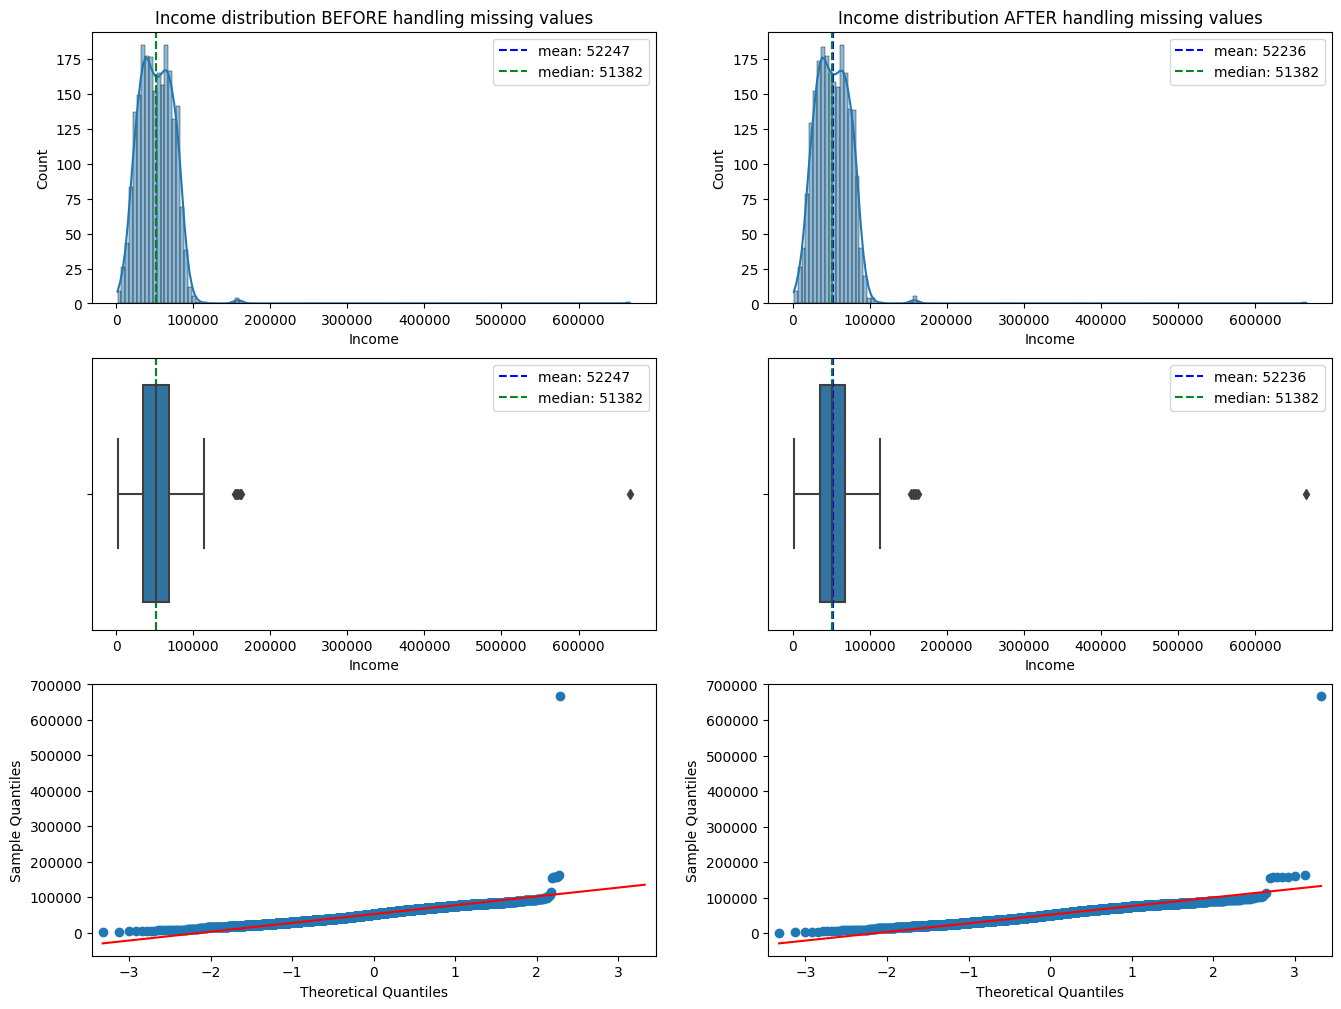

In [29]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16,12))

axhist = [ax1,ax2]
axbox = [ax3,ax4]
axqq = [ax5,ax6]
values = [df_original, df_combine]
title = ['Income distribution BEFORE handling missing values','Income distribution AFTER handling missing values']

for i in zip(values, axhist, axbox, axqq, title):
    sns.histplot(i[0], x='Income', kde=True, ax=i[1])
    sns.boxplot(i[0], x='Income', ax=i[2])
    sm.qqplot(i[0]['Income'], line='q', ax=i[3])
    # set title
    i[1].set_title(i[4])
    # legend for histplot (mean and median)
    i[1].axvline(x=i[0]['Income'].mean(), color='blue', label=f"mean: {round(i[0]['Income'].mean())}", linestyle='--')
    i[1].axvline(x=i[0]['Income'].median(), color='#04871a', label=f"median: {round(i[0]['Income'].median())}", linestyle='--')
    # legend for boxplot (mean and median)
    i[2].axvline(x=i[0]['Income'].mean(), color='blue', label=f"mean: {round(i[0]['Income'].mean())}", linestyle='--')
    i[2].axvline(x=i[0]['Income'].median(), color='#04871a', label=f"median: {round(i[0]['Income'].median())}", linestyle='--')
    # show legend
    i[1].legend()
    i[2].legend()

Insight:
- there is no significant difference in the mean, even the median value is the same.

2. Frequentist Test: Shapiro Wilk Test

In [30]:
# import shapiro module
from scipy.stats import shapiro

# list of df based on year_birth
dflist1 = ['df_original', 'df_combine']

# check the distribution
for i in dflist1:
    # pvalue
    stats, pvalue = shapiro(eval(i)['Income'])
    # check the ppvalue
    if pvalue > 0.05:
        print(f"pvalue: {pvalue}. So, income in {i} has normal distribution")
    else:
        print(f"pvalue: {pvalue}. So, income in {i} has NOT normal distribution")

pvalue: 1.0. So, income in df_original has normal distribution
pvalue: 0.0. So, income in df_combine has NOT normal distribution


Insight:
- after testing using the Shapiro method, it is known that the Income column in both DataFrames have NOT normal distribution. So, we have to use Non-Parametric Method for statistical test

In [31]:
# stats, pvalue = shapiro(df_original.query("~Income.isna()")['Income'])
# pvalue

In [32]:
# from scipy.stats import ks_2samp

# ks_2samp(df_original.query("~Income.isna()")['Income'], df_combine['Income'], alternative='two-sided')

>#### perform statistical tests on both DataFrames

Hypothesis:
- Ho : Median Before handling missing values of difference = After handling missing values of difference
<br>
- Ha : Median Before handling missing values of difference $\not=$ After handling missing values of difference


significance level (alpha) = 0.05

- Reference:
<br>
1. [How to Perform a Kolmogorov-Smirnov Test in Python](https://www.statology.org/kolmogorov-smirnov-test-python/)
<br>
2. [scipy.stats.ks_2samp documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html)

In [33]:
from scipy.stats import ks_2samp

stats, pvalue = ks_2samp(df_original['Income'], df_combine['Income'], alternative='two-sided')

# check the hypothesis:
if pvalue > 0.05:
    print(f"pvalue: {pvalue}. So, income in DataFrame BEFORE and AFTER handling missing values has same distribution")
else:
    print(f"pvalue: {pvalue}. So, income in DataFrame BEFORE and AFTER handling missing values has NOT same distribution")


pvalue: 0.9995275967209977. So, income in DataFrame BEFORE and AFTER handling missing values has same distribution


> ### Handling duplicated data

In [34]:
print(f"Number of duplicated data : {df_updated[df_updated.duplicated()].shape[0]} rows")
df_updated[df_updated.duplicated()]

Number of duplicated data : 0 rows


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


---------------

---------------------

## Feature Engineering

> ### make new columns called age and  age_category in order to easier to read

#### `age_category` based on [National Institues of Health](https://www.nih.gov/nih-style-guide/age) and [Classification of Age Groups Based on Facial Features](https://www.researchgate.net/publication/228404297_Classification_of_Age_Groups_Based_on_Facial_Features)
- Children (1 year through 12 years)
- teenagers (13 years through 17 years)
- Adults (18 years through 39 years)
- Middle-aged Adults (40 years thorough 59 years)
- old adults (60 years and older)

In [35]:
# Insert age column based on when the customer registered as a member
df_updated.insert(loc = 2, 
          column = 'age', 
          value = df_updated['Dt_Customer'].dt.year - df_updated['Year_Birth'])

# make new column called age_category and import function from my own module called ageclass
df_updated['age_category'] = df_updated.apply(fnc1.ageclass, args=('age',), axis=1)
df_updated.head()

,ID,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age_category
0,5524,1957,55,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,middle-aged adults
1,2174,1954,60,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,old adults
2,4141,1965,48,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,middle-aged adults
3,6182,1984,30,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,adults
4,5324,1981,33,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,adults


> ### make new column called num_children (number of children = Kidhome + Teenhome) and has_child column

In [36]:
# insert num_children column
df_updated.insert(loc = 8, 
          column = 'num_children', 
          value = df_updated['Kidhome'] + df_updated['Teenhome'])

In [37]:
# insert has_child column
def haschild(df):
    if df['num_children'] >= 1: return "Yes"
    else: return "No"
# apply haschild function
df_updated['has_child'] = df_updated.apply(haschild, axis=1)

df_updated.head()

,ID,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,num_children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age_category,has_child
0,5524,1957,55,Graduation,Single,58138.0,0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,middle-aged adults,No
1,2174,1954,60,Graduation,Single,46344.0,1,1,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,old adults,Yes
2,4141,1965,48,Graduation,Together,71613.0,0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,middle-aged adults,No
3,6182,1984,30,Graduation,Together,26646.0,1,0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,adults,Yes
4,5324,1981,33,PhD,Married,58293.0,1,0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,adults,Yes


> ### replace 2n Cycle in education column with Master (in order to reduce data rendundancy)

- based on article [study levels and degrees](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/), 2n Cycle and Master has the same meaning

In [38]:
df_updated['Education'].replace(to_replace='2n Cycle', value='Master', inplace=True)

# check unique value in Education column
df_updated['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

> ### replace several values in marital_status column (in order to reduce data rendundancy)

<br>- replace "Together" with "Married" 
<br>- YOLO and Absurd with "others"
<br>- Alone with "Single"

**reference articles:**
1. [Marital status](https://www.cdc.gov/nchs/hus/sources-definitions/marital-status.htm#print)
2. [Classification of legal marital status](https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=61748&CVD=61748&CLV=0&MLV=1&D=1)

In [39]:
# check number of each value in marital_status column
df_updated.Marital_Status.value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [40]:
# replace several values
replace_values = {
                'Together' : 'Married',
                'YOLO' : 'Single',
                'Absurd' : 'Single',
                'Alone' : 'Single'
}

df_updated['Marital_Status'].replace(replace_values, inplace=True)

# check number of each value in marital_status column
df_updated.Marital_Status.value_counts()

Marital_Status
Married     1444
Single       487
Divorced     232
Widow         77
Name: count, dtype: int64

> ### Make income_category column

Based on the normality test above of the income column has not normal distribution, therefore MAD can be use as measure of central tendency. From there, we can make discretization of income into 3 category.
<br>
**Income category:**
1. Low Income
2. Medium Income
3. High Income

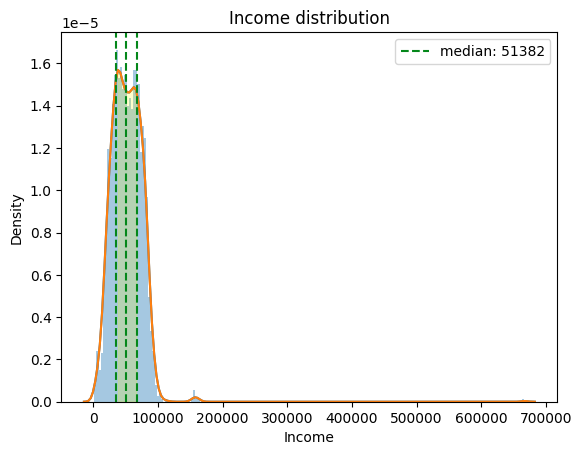

In [41]:
from scipy.stats import median_abs_deviation

# median of income
median = df_updated['Income'].median()

# MAD
MAD = median_abs_deviation(df_updated['Income'])

# set graph's title
plt.title("Income distribution")

# distribution plot & get x and y daya
line = sns.distplot(df_updated['Income'], bins=200).get_lines()[0]
plt.plot(line.get_xdata(), line.get_ydata())
kde_x, kde_y = line.get_xdata(), line.get_ydata()

# mark where medium income is located
plt.fill_between(
    kde_x, kde_y,
    where=(kde_x > median-MAD) & (kde_x < median+MAD), 
    color='yellow', 
    alpha=0.2
)

# mark median and the spread
plt.axvline(x=df_updated['Income'].median(), color='#04871a', label=f"median: {round(df_updated['Income'].median())}", linestyle='--')
plt.axvline(x=median-MAD, color='#04871a', linestyle='--')
plt.axvline(x=median+MAD, color='#04871a', linestyle='--')

# dipslay legend
plt.legend();

In this case we can get insight:
- Income that is less than the median-MAD can be categorized as **low income**
- Income that is between median-MAD and median+MAD can be categorized as **medium income**
- Income that is greater than the median+MAD can be categorized as **high income**

In [42]:
from scipy.stats import median_abs_deviation

# median of your data
median = df_updated['Income'].median()

# MAD
MAD = median_abs_deviation(df_updated['Income'])

df_updated['income_category'] = df_updated.apply(fnc1.category, args=('Income','income', median, MAD, 0, 0, 'not normal'), axis=1)
df_updated.head()

,ID,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,num_children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age_category,has_child,income_category
0,5524,1957,55,Graduation,Single,58138.0,0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,middle-aged adults,No,medium income
1,2174,1954,60,Graduation,Single,46344.0,1,1,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,old adults,Yes,medium income
2,4141,1965,48,Graduation,Married,71613.0,0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,middle-aged adults,No,high income
3,6182,1984,30,Graduation,Married,26646.0,1,0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,adults,Yes,low income
4,5324,1981,33,PhD,Married,58293.0,1,0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,adults,Yes,medium income


>### Drop column Z_CostContact and Z_Revenue

In [43]:
import statistics
display(f"the variance of Z_CostContact: {statistics.variance(df_updated['Z_CostContact'])}", f"the variance of Z_Revenue: {statistics.variance(df_updated['Z_Revenue'])}")

'the variance of Z_CostContact: 0'

'the variance of Z_Revenue: 0'

insight:
- because the variance is zero or in other words, it only has one unique value, so we can drop the column.

In [44]:
# drop Z_CostContact and Z_Revenue
df_updated.drop(columns=['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

df_updated.head()

,ID,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,num_children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age_category,has_child,income_category
0,5524,1957,55,Graduation,Single,58138.0,0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,middle-aged adults,No,medium income
1,2174,1954,60,Graduation,Single,46344.0,1,1,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,old adults,Yes,medium income
2,4141,1965,48,Graduation,Married,71613.0,0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,middle-aged adults,No,high income
3,6182,1984,30,Graduation,Married,26646.0,1,0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,adults,Yes,low income
4,5324,1981,33,PhD,Married,58293.0,1,0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,adults,Yes,medium income


> ### Sort the columns based on supermarket_customer.pdf
- in order to make it easy to read

In [45]:
# rearanged columns based on Supermarket Customers Data Dictionary_2.pdf
rearangedColumns = [
        'ID', 'Year_Birth', 'age', 'age_category', 'Education', 'Marital_Status', 'Income', 'income_category', 'Kidhome', 'Teenhome', 'num_children', 'has_child', 'Dt_Customer', 'Recency', 'Complain', \
        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', \
        'NumDealsPurchases', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', \
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', \
        ]

# DataFrame that already contains sorted columns
df_updated = df_updated[rearangedColumns]
df_updated.head()

,ID,Year_Birth,age,age_category,Education,Marital_Status,Income,income_category,Kidhome,Teenhome,num_children,has_child,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,55,middle-aged adults,Graduation,Single,58138.0,medium income,0,0,0,No,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7
1,2174,1954,60,old adults,Graduation,Single,46344.0,medium income,1,1,2,Yes,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5
2,4141,1965,48,middle-aged adults,Graduation,Married,71613.0,high income,0,0,0,No,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4
3,6182,1984,30,adults,Graduation,Married,26646.0,low income,1,0,1,Yes,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6
4,5324,1981,33,adults,PhD,Married,58293.0,medium income,1,0,1,Yes,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5


> ### Save clean data into new csv file

In [47]:
df_updated.to_csv(r'C:\Users\faisa\Desktop\DataSciencePurwadhika\Modul2\CapstonProjectModul2\data\processed\SupermarketCustomer.csv', index=False)